In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [63]:
Data = pd.read_csv("UNSW_NB15_training-set.csv")

In [64]:
Data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [34]:
Data["attack_cat"].value_counts()

6    37000
5    18871
3    11132
4     6062
2     4089
7     3496
0      677
1      583
8      378
9       44
Name: attack_cat, dtype: int64

In [35]:
Data["label"].value_counts()

1    45332
0    37000
Name: label, dtype: int64

In [4]:
Data.describe()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
count,82332.000000,82332.000000,82332.000000,82332.000000,8.233200e+04,8.233200e+04,8.233200e+04,82332.000000,82332.000000,8.233200e+04,...,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000,82332.000000
mean,41166.500000,1.006756,18.666472,17.545936,7.993908e+03,1.323379e+04,8.241089e+04,180.967667,95.713003,6.454902e+07,...,4.928898,3.663011,7.456360,0.008284,0.008381,0.129743,6.468360,9.164262,0.011126,0.550600
std,23767.345519,4.710444,133.916353,115.574086,1.716423e+05,1.514715e+05,1.486204e+05,101.513358,116.667722,1.798618e+08,...,8.389545,5.915386,11.415191,0.091171,0.092485,0.638683,8.543927,11.121413,0.104891,0.497436
min,1.000000,0.000000,1.000000,0.000000,2.400000e+01,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
25%,20583.750000,0.000008,2.000000,0.000000,1.140000e+02,0.000000e+00,2.860611e+01,62.000000,0.000000,1.120247e+04,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000
50%,41166.500000,0.014138,6.000000,2.000000,5.340000e+02,1.780000e+02,2.650177e+03,254.000000,29.000000,5.770032e+05,...,1.000000,1.000000,3.000000,0.000000,0.000000,0.000000,3.000000,5.000000,0.000000,1.000000
75%,61749.250000,0.719360,12.000000,10.000000,1.280000e+03,9.560000e+02,1.111111e+05,254.000000,252.000000,6.514286e+07,...,4.000000,3.000000,6.000000,0.000000,0.000000,0.000000,7.000000,11.000000,0.000000,1.000000
max,82332.000000,59.999989,10646.000000,11018.000000,1.435577e+07,1.465753e+07,1.000000e+06,255.000000,253.000000,5.268000e+09,...,59.000000,38.000000,63.000000,2.000000,2.000000,16.000000,60.000000,62.000000,1.000000,1.000000


In [5]:
Data.isnull().sum()

id                   0
dur                  0
proto                0
service              0
state                0
spkts                0
dpkts                0
sbytes               0
dbytes               0
rate                 0
sttl                 0
dttl                 0
sload                0
dload                0
sloss                0
dloss                0
sinpkt               0
dinpkt               0
sjit                 0
djit                 0
swin                 0
stcpb                0
dtcpb                0
dwin                 0
tcprtt               0
synack               0
ackdat               0
smean                0
dmean                0
trans_depth          0
response_body_len    0
ct_srv_src           0
ct_state_ttl         0
ct_dst_ltm           0
ct_src_dport_ltm     0
ct_dst_sport_ltm     0
ct_dst_src_ltm       0
is_ftp_login         0
ct_ftp_cmd           0
ct_flw_http_mthd     0
ct_src_ltm           0
ct_srv_dst           0
is_sm_ips_ports      0
attack_cat 

In [6]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82332 entries, 0 to 82331
Data columns (total 45 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 82332 non-null  int64  
 1   dur                82332 non-null  float64
 2   proto              82332 non-null  object 
 3   service            82332 non-null  object 
 4   state              82332 non-null  object 
 5   spkts              82332 non-null  int64  
 6   dpkts              82332 non-null  int64  
 7   sbytes             82332 non-null  int64  
 8   dbytes             82332 non-null  int64  
 9   rate               82332 non-null  float64
 10  sttl               82332 non-null  int64  
 11  dttl               82332 non-null  int64  
 12  sload              82332 non-null  float64
 13  dload              82332 non-null  float64
 14  sloss              82332 non-null  int64  
 15  dloss              82332 non-null  int64  
 16  sinpkt             823

In [7]:
Data.head(2)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0


In [8]:
# 1st nomianl Boject in Dataset

In [9]:
Data["proto"].value_counts()
# "proto" means diffrent types for Protocalls

tcp           43095
udp           29418
unas           3515
arp             987
ospf            676
              ...  
br-sat-mon       32
pvp              32
wsn              32
ib               31
igmp             30
Name: proto, Length: 131, dtype: int64

In [10]:
XX=Data["proto"].value_counts()


In [11]:
XX

tcp           43095
udp           29418
unas           3515
arp             987
ospf            676
              ...  
br-sat-mon       32
pvp              32
wsn              32
ib               31
igmp             30
Name: proto, Length: 131, dtype: int64

In [12]:
len(Data["proto"].value_counts())

# there is 131 types of Protocalls available

131

In [13]:
Data.head(4)

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.0902,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.0003,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.0051,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.6608,...,1,3,0,0,0,2,3,0,Normal,0


In [14]:
len(Data.columns)

45

In [15]:
# 2nd  Nomial type Object in Dataset

In [16]:
Data["service"].value_counts()

-           47153
dns         21367
http         8287
smtp         1851
ftp          1552
ftp-data     1396
pop3          423
ssh           204
ssl            30
snmp           29
dhcp           26
radius          9
irc             5
Name: service, dtype: int64

In [17]:
# 3rd  Nomial type Object in Dataset

In [18]:
Data["state"].value_counts()

FIN    39339
INT    34163
CON     6982
REQ     1842
ACC        4
RST        1
CLO        1
Name: state, dtype: int64

In [20]:
 Data["attack_cat"].value_counts()

Normal            37000
Generic           18871
Exploits          11132
Fuzzers            6062
DoS                4089
Reconnaissance     3496
Analysis            677
Backdoor            583
Shellcode           378
Worms                44
Name: attack_cat, dtype: int64

In [21]:
# label  encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

Data['proto']= label_encoder.fit_transform(Data['proto'])
Data['service']= label_encoder.fit_transform(Data['service'])
Data['state']= label_encoder.fit_transform(Data['state'])
Data['attack_cat']= label_encoder.fit_transform(Data['attack_cat'])

In [22]:
Data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,117,0,4,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,6,0
1,2,0.000008,117,0,4,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,6,0
2,3,0.000005,117,0,4,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,6,0
3,4,0.000006,117,0,4,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,6,0
4,5,0.000010,117,0,4,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,117,0,4,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,6,0
82328,82329,1.106101,111,0,3,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,6,0
82329,82330,0.000000,6,0,4,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,6,0
82330,82331,0.000000,6,0,4,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,6,0


In [38]:
x=Data.drop(["attack_cat"], axis=1)

In [40]:
y=Data["attack_cat"]

In [ ]:
## Filter methods

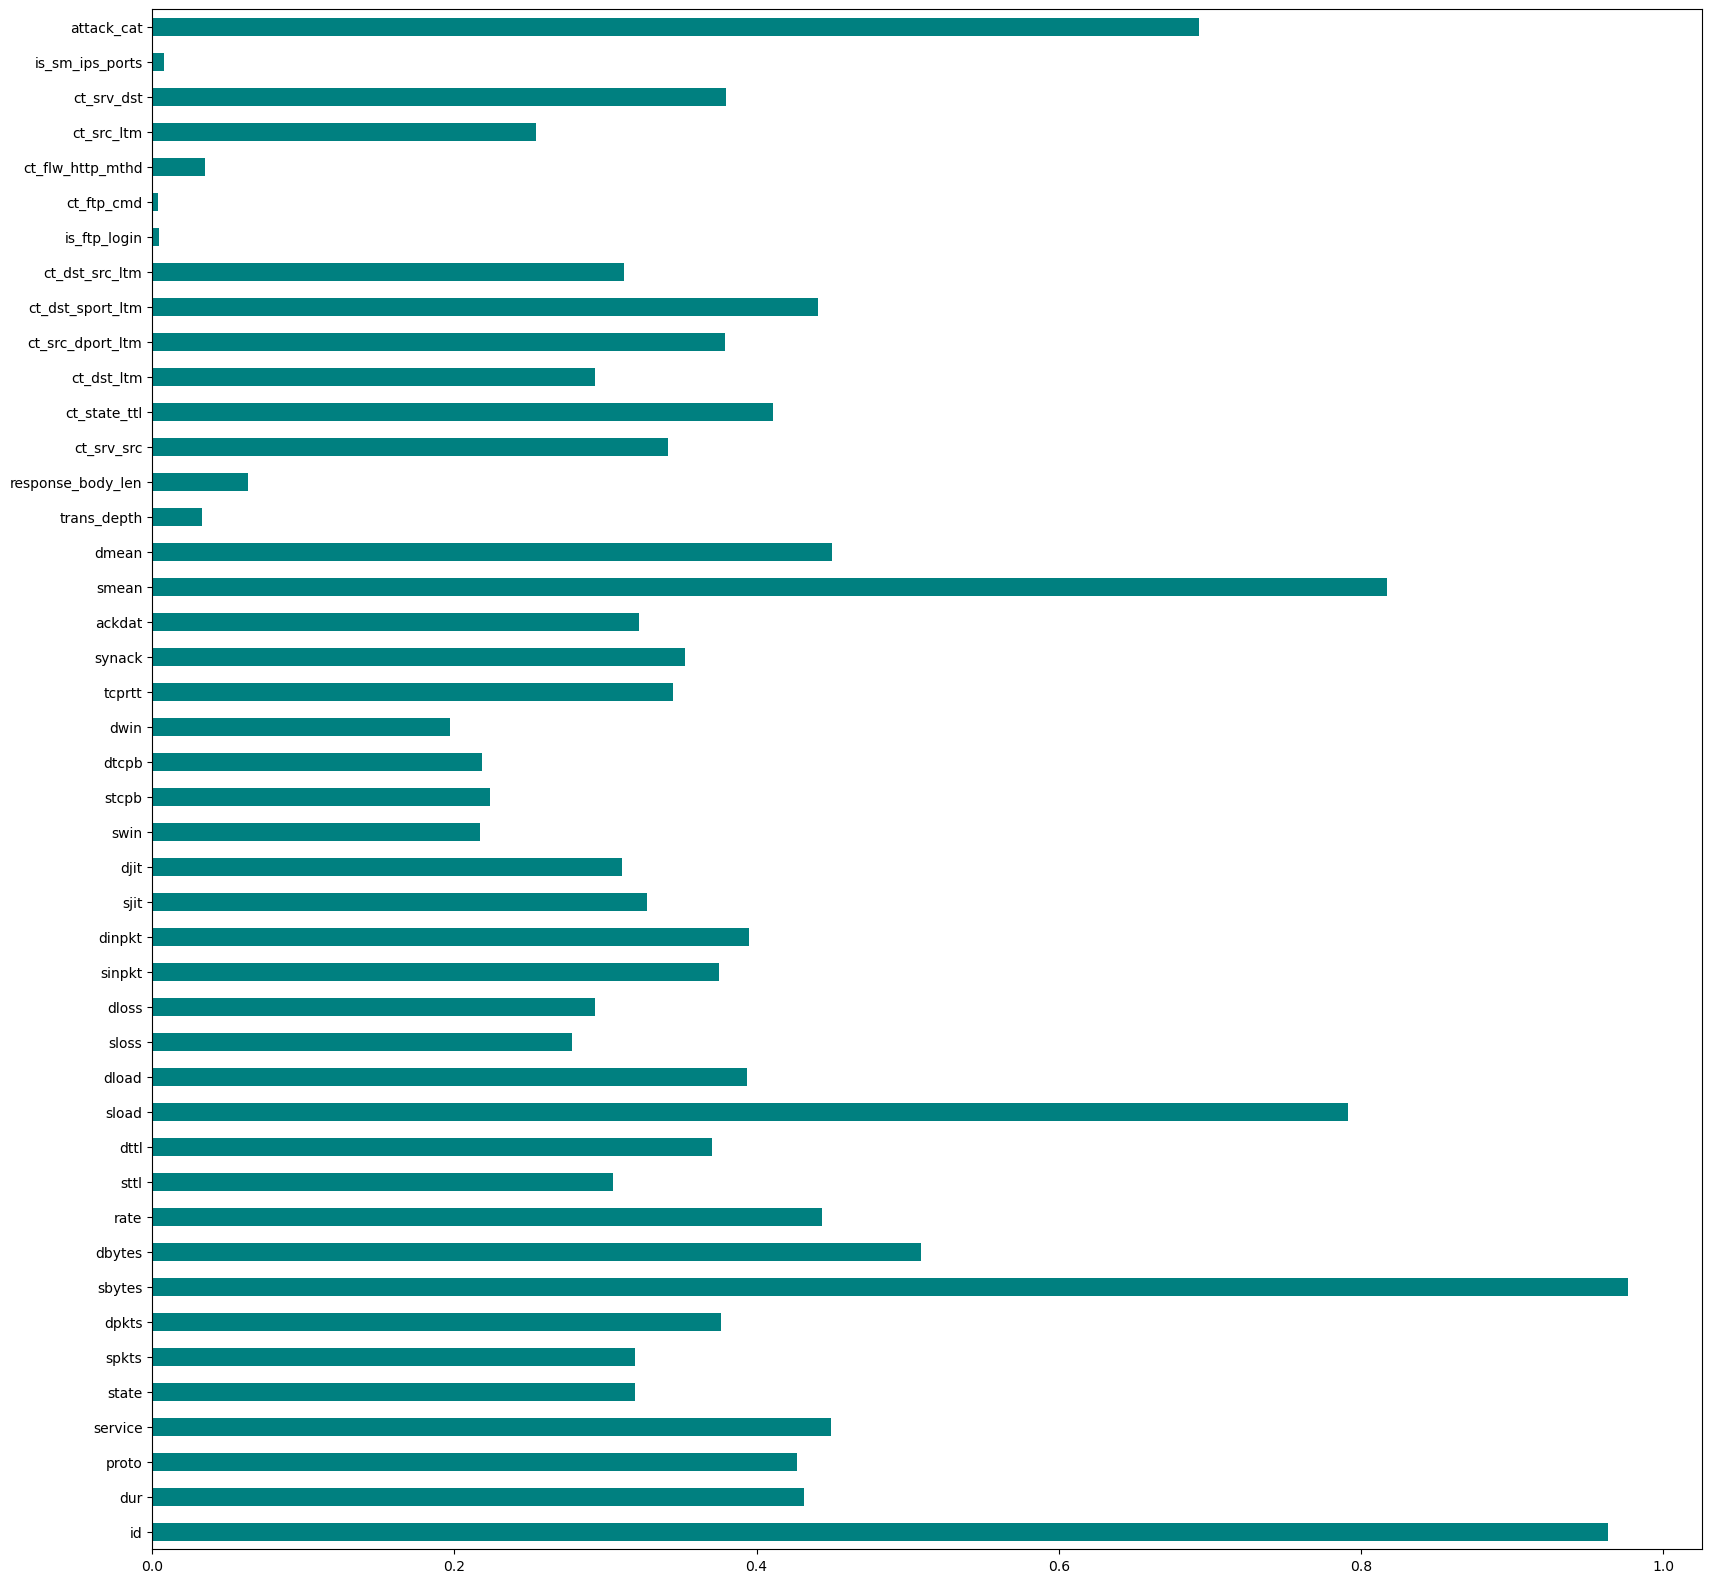

In [44]:
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt
%matplotlib inline

importances = mutual_info_classif(x,y)
feat_importance = pd.Series(importances,Data.columns[0:len(Data.columns)-1])
feat_importance.plot(kind='barh', color = 'teal',figsize =(20,20))
plt.show()

In [45]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

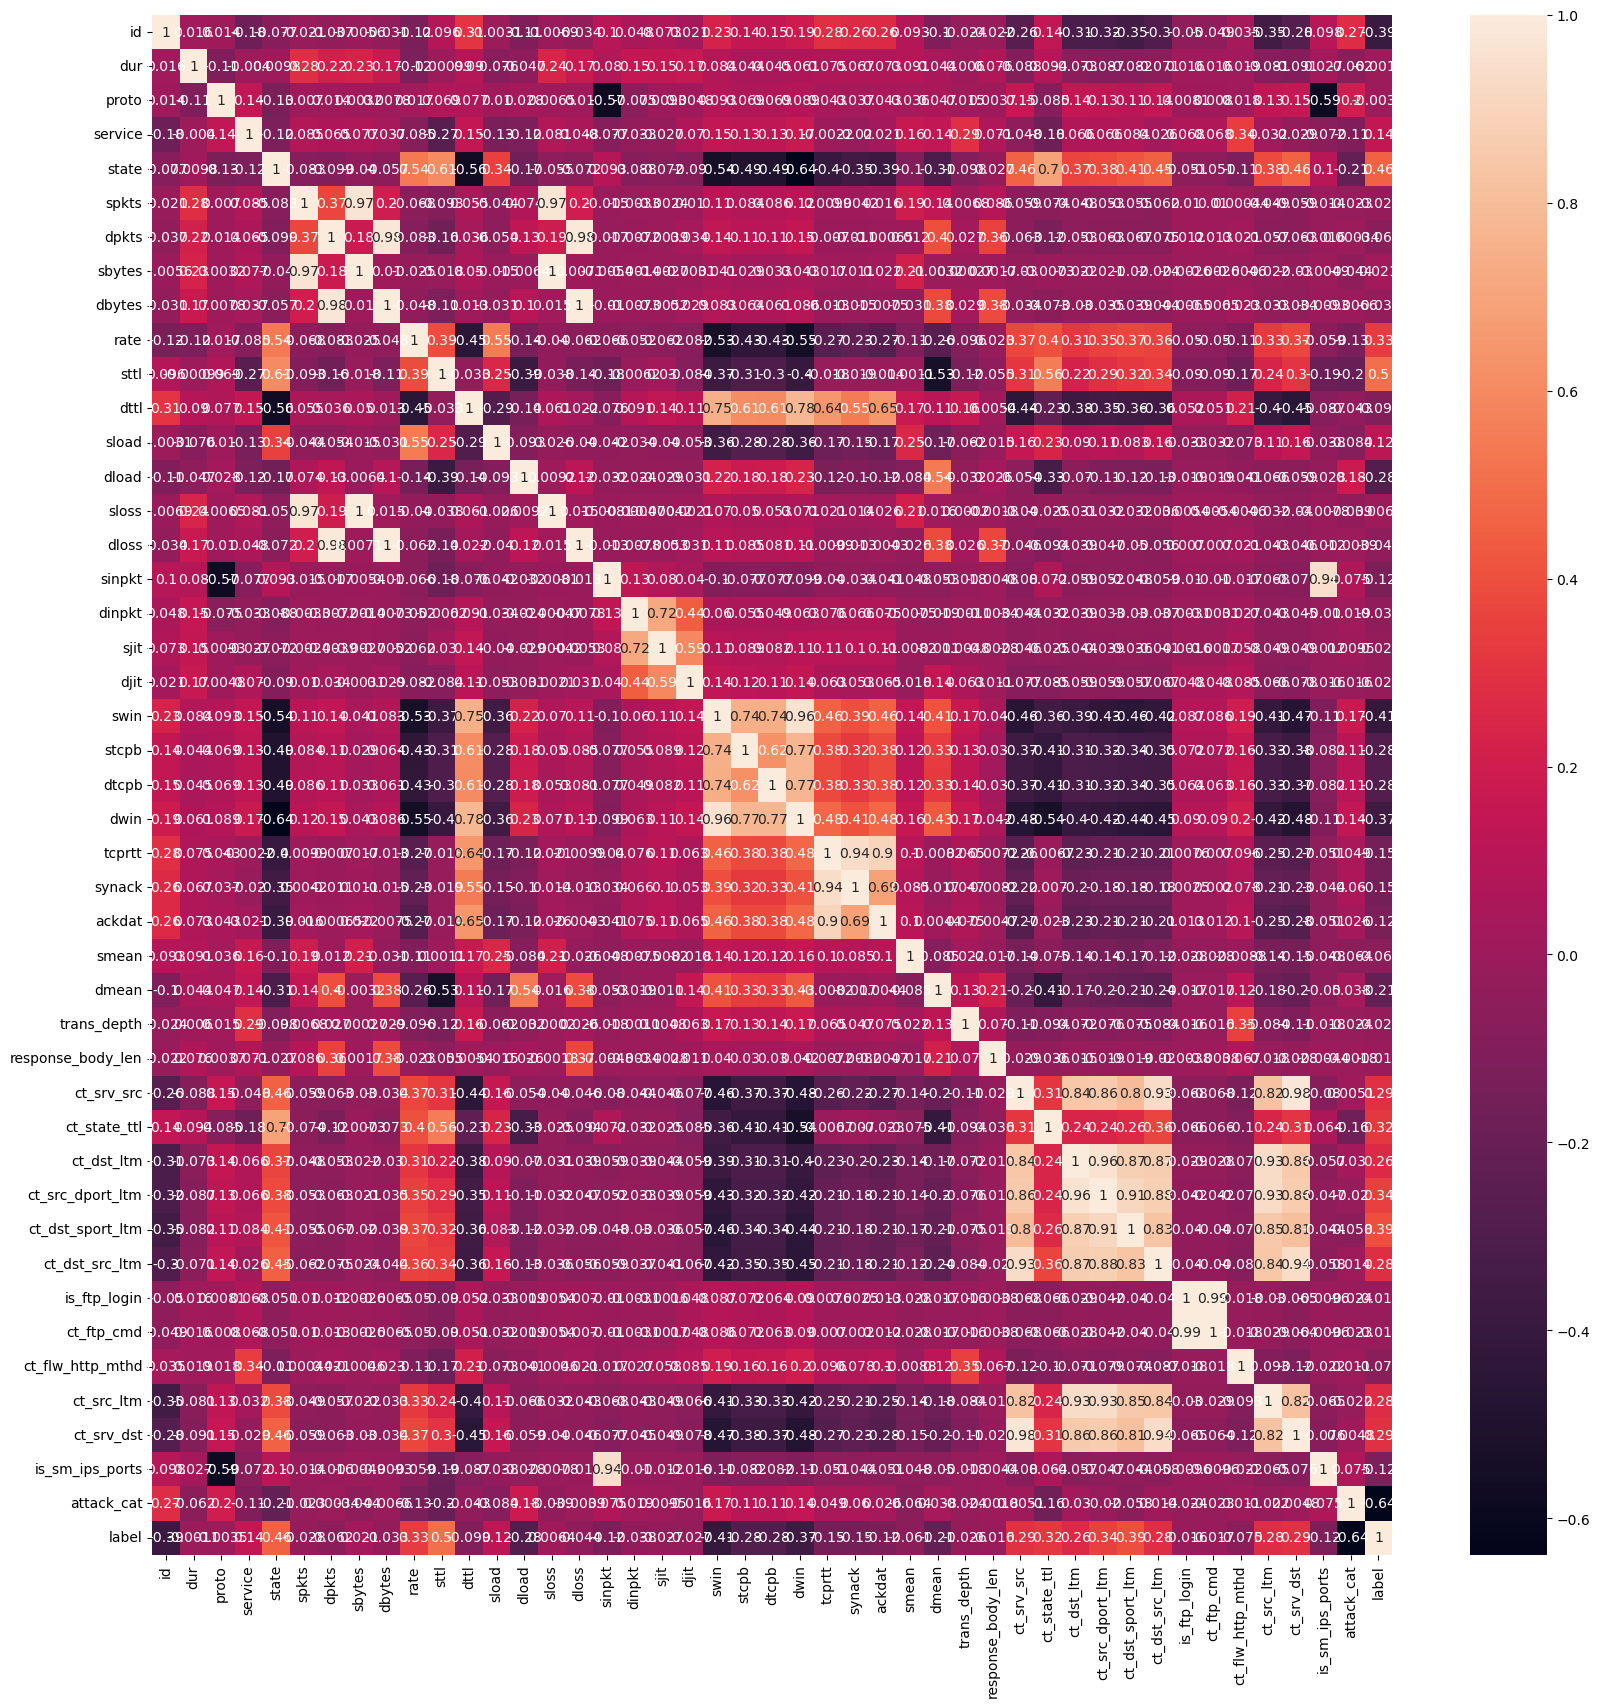

In [46]:
cor = Data.corr()
plt.figure(figsize = (20,20))
sns.heatmap(cor,annot = True)

<AxesSubplot:>

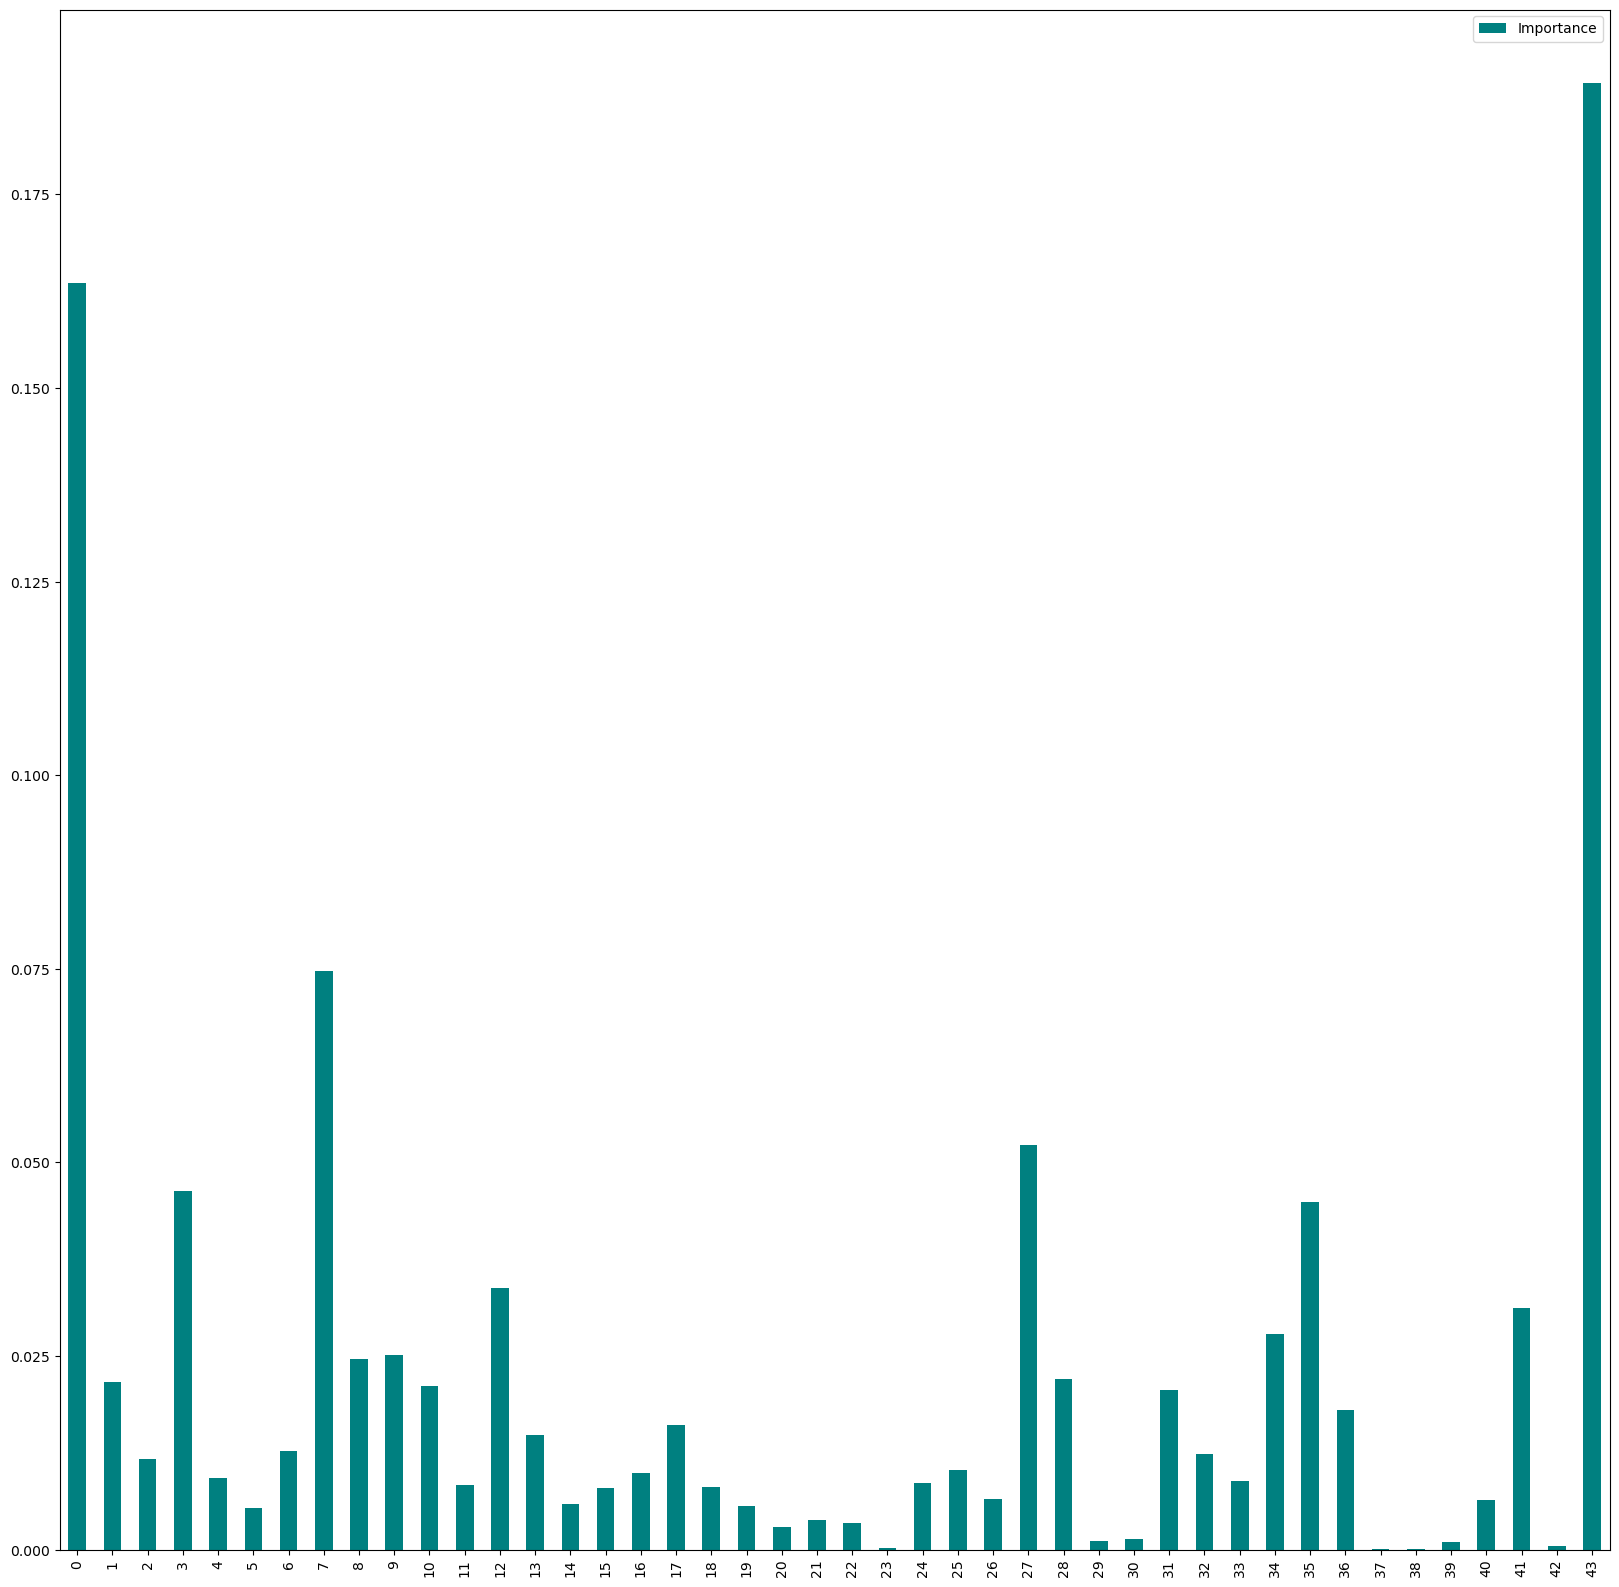

In [47]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=340)

model.fit(x,y)
importances = model.feature_importances_

final_df = pd.DataFrame({"Features": pd.DataFrame(x).columns,"Importance":importances})
#final_df.set_index("attack_cat")

#final_df = final_df.sort_values("attack_cat")

final_df.plot.bar(color = "teal",figsize = (20,20))

In [ ]:
# should delet features in dataset

## 'is_sm_ips_ports' , 'ct_flw_http_mthd' , 'ct_ftp_cmd' , 'is_ftp_login' , 'response_body_len' , 'trans_depth'

In [48]:
Data=Data.drop(['is_sm_ips_ports','ct_flw_http_mthd','swin','ct_ftp_cmd','is_ftp_login','response_body_len','trans_depth','dwin'], axis=1)
Data

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_srv_src,ct_state_ttl,ct_dst_ltm,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,ct_src_ltm,ct_srv_dst,attack_cat,label
0,1,0.000011,117,0,4,2,0,496,0,90909.090200,...,2,2,1,1,1,2,1,2,6,0
1,2,0.000008,117,0,4,2,0,1762,0,125000.000300,...,2,2,1,1,1,2,1,2,6,0
2,3,0.000005,117,0,4,2,0,1068,0,200000.005100,...,3,2,1,1,1,3,1,3,6,0
3,4,0.000006,117,0,4,2,0,900,0,166666.660800,...,3,2,2,2,1,3,2,3,6,0
4,5,0.000010,117,0,4,2,0,2126,0,100000.002500,...,3,2,2,2,1,3,2,3,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,117,0,4,2,0,104,0,200000.005100,...,1,2,2,1,1,2,2,1,6,0
82328,82329,1.106101,111,0,3,20,8,18062,354,24.410067,...,1,1,2,1,1,1,3,2,6,0
82329,82330,0.000000,6,0,4,1,0,46,0,0.000000,...,1,2,1,1,1,1,1,1,6,0
82330,82331,0.000000,6,0,4,1,0,46,0,0.000000,...,1,2,1,1,1,1,1,1,6,0


# Train Test Split

In [49]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=0)

# fit model

In [50]:
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics

In [51]:
# clf = RandomForestClassifier(n_estimators = 100)  

In [52]:
clf = RandomForestClassifier(n_estimators=300,verbose=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print("ACCURACY OF THE MODEL: ", metrics.accuracy_score(y_test, y_pred))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:   23.8s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


ACCURACY OF THE MODEL:  0.8972490435416287


[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.8s finished


In [53]:
 # Evaluate Regression model with R-square Matrics 
    
    
from sklearn.metrics import r2_score

r2_score(y_test, y_pred)

0.7306783958571367

In [54]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_pred))
print(math.sqrt(mean_squared_error(y_test, y_pred)))

0.5524989372684763
0.7433027224949982


In [55]:
test_sample=x_test.iloc[0:1,:]

In [56]:
test_sample

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
75179,75180,0.000003,111,0,5,2,0,90,0,333333.3215,...,1,1,6,0,0,0,4,6,0,0


In [57]:
test_sample.values

array([[7.51800000e+04, 3.00000000e-06, 1.11000000e+02, 0.00000000e+00,
        5.00000000e+00, 2.00000000e+00, 0.00000000e+00, 9.00000000e+01,
        0.00000000e+00, 3.33333322e+05, 2.54000000e+02, 0.00000000e+00,
        1.19999992e+08, 0.00000000e+00, 1.00000000e+00, 0.00000000e+00,
        3.00000000e-03, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        2.55000000e+02, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.50000000e+01,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 8.00000000e+00,
        6.00000000e+00, 3.00000000e+00, 1.00000000e+00, 1.00000000e+00,
        6.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        4.00000000e+00, 6.00000000e+00, 0.00000000e+00, 0.00000000e+00]])

# Predict 

In [82]:
Test=clf.predict(test_sample)
Dict = {6:"Normal",5:"Generic",3:"Exploits",4:"Fuzzers",2:"DoS",7:"Reconnaissance",0:"Analysis",1:"Backdoor",8:"Shellcode",9:"Worms"}
print("This is a ",Dict[int(Test)]," type attack ")

This is a  Normal  type attack 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 300 out of 300 | elapsed:    0.0s finished


# Save the Data

In [39]:
Data.to_csv("Data.csv")

In [2]:
Data = pd.read_csv("Data.csv")

In [84]:
Data.loc[::]

,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.000011,udp,-,INT,2,0,496,0,90909.090200,...,1,2,0,0,0,1,2,0,Normal,0
1,2,0.000008,udp,-,INT,2,0,1762,0,125000.000300,...,1,2,0,0,0,1,2,0,Normal,0
2,3,0.000005,udp,-,INT,2,0,1068,0,200000.005100,...,1,3,0,0,0,1,3,0,Normal,0
3,4,0.000006,udp,-,INT,2,0,900,0,166666.660800,...,1,3,0,0,0,2,3,0,Normal,0
4,5,0.000010,udp,-,INT,2,0,2126,0,100000.002500,...,1,3,0,0,0,2,3,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82327,82328,0.000005,udp,-,INT,2,0,104,0,200000.005100,...,1,2,0,0,0,2,1,0,Normal,0
82328,82329,1.106101,tcp,-,FIN,20,8,18062,354,24.410067,...,1,1,0,0,0,3,2,0,Normal,0
82329,82330,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0
82330,82331,0.000000,arp,-,INT,1,0,46,0,0.000000,...,1,1,0,0,0,1,1,1,Normal,0


In [11]:
# importing the module
import pandas as pd

# creating a sample dataframe
data = pd.DataFrame({'Brand': ['Maruti', 'Hyundai', 'Tata',
							'Mahindra', 'Maruti', 'Hyundai',
							'Renault', 'Tata', 'Maruti'],
					'Year': [2012, 2014, 2011, 2015, 2012,
							2016, 2014, 2018, 2019],
					'Kms Driven': [50000, 30000, 60000,
									25000, 10000, 46000,
									31000, 15000, 12000],
					'City': ['Gurgaon', 'Delhi', 'Mumbai',
							'Delhi', 'Mumbai', 'Delhi',
							'Mumbai', 'Chennai', 'Ghaziabad'],
					'Mileage': [28, 27, 25, 26, 28,
								29, 24, 21, 24]})

# displaying the DataFrame
display(data)


,Brand,Year,Kms Driven,City,Mileage
0,Maruti,2012,50000,Gurgaon,28
1,Hyundai,2014,30000,Delhi,27
2,Tata,2011,60000,Mumbai,25
3,Mahindra,2015,25000,Delhi,26
4,Maruti,2012,10000,Mumbai,28
5,Hyundai,2016,46000,Delhi,29
6,Renault,2014,31000,Mumbai,24
7,Tata,2018,15000,Chennai,21
8,Maruti,2019,12000,Ghaziabad,24


In [22]:
z=data.iloc[6:7,:]

In [23]:
z

,Brand,Year,Kms Driven,City,Mileage
6,Renault,2014,31000,Mumbai,24
